In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Load Dataset
df=pd.read_csv(r"/content/heart.csv")
print(df.head())
print(df.columns.to_list())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [6]:
#Checking Missing Values
print("\n Missing Values : ")
print(df.isnull().sum())



 Missing Values : 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
#Check for duplicates
print("\n Duplicate Values: ", df.duplicated().sum())



 Duplicate Values:  723


In [8]:
#Check Categorical Columns
print("\n Categorical Columns:")
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)


 Categorical Columns:
Index([], dtype='object')


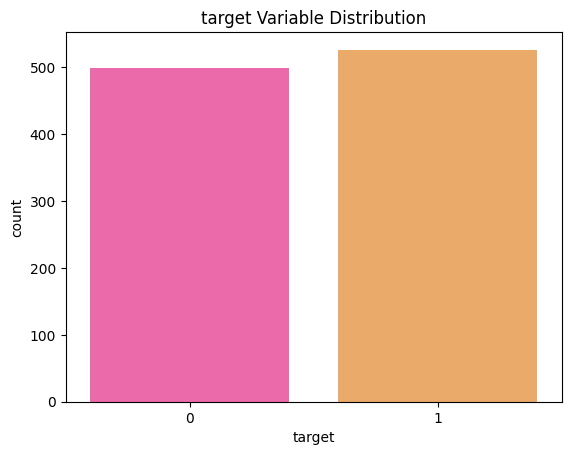

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


In [16]:
#Check Target Variable Balance

sns.countplot(x='target',data=df, palette='spring')
plt.title("target Variable Distribution")
plt.show()
print(df['target'].value_counts(normalize=True))

As depicted both classes are roughly balanced. If one class however was significantly greated in dimension comparitively to its counter class the dataset would be imbalanced. Using Resampling this can be altered to reduce the bias towards the larger class

In [17]:
#Handling Missing data

df = df.drop_duplicates()

#Fill Missing values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])



Median is less impacted by outliers in numerical columns

Mode is preferred for categorical columns since it replaces missing values with the most frequent category

Duplicates are dropped to avoid bias



In [18]:
#Encoding
le = LabelEncoder()
for cols in cat_cols:
  df[col] = le.fit_transform(df[col])

In [19]:
#Feature Scaling
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Model uses AdaBoost and Random Forest therefore no scaling is needed.

In [24]:
#Split Dataset
X = df.drop('target', axis=1)
Y = df['target']

#  Split into 80% train, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#  Split the 80% into 70% train, 30% validation
X_train_split, X_val, Y_train_split, Y_val = train_test_split(
    X_train, Y_train, test_size=0.3, random_state=0
)

print("Train shape:", X_train_split.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (168, 13)
Validation shape: (73, 13)
Test shape: (61, 13)


Validation set helps tune the models parameters before the final testing phase. Gives a fair estimate of the model's performance on unseen data

In [25]:
#Random Forest

rf= RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf.fit(X_train_split, Y_train_split)
Y_val_pred = rf.predict(X_val)
Y_test_pred = rf.predict(X_test)

print("Random Forest Validation Accuracy: ",accuracy_score(Y_val, Y_val_pred))
print("Random Forest Test Accuracy: ",accuracy_score(Y_test, Y_test_pred))

Random Forest Validation Accuracy:  0.7808219178082192
Random Forest Test Accuracy:  0.8032786885245902


In [29]:
#AdaBoost

ada = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth=1),
    n_estimators = 100,
    learning_rate = 0.5,
    random_state = 0
)

ada.fit(X_train_split, Y_train_split)
Y_val_pred_ada = ada.predict(X_val)
Y_test_pred_ada = ada.predict(X_test)

print("AdaBoost Validation Accuracy: ", accuracy_score(Y_val, Y_val_pred_ada))
print("AdaBoost Test Accuracy: ", accuracy_score(Y_test, Y_test_pred_ada))

AdaBoost Validation Accuracy:  0.821917808219178
AdaBoost Test Accuracy:  0.8032786885245902


Random Forest usually performs better when data is noisy or high-dimensional.

AdaBoost is great when features are clean and less noisy.

Validation accuracy helps choose the better-performing model before testing on the unseen test set.